# Data exploration and Analysis

In [692]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load libraries for data handling and visualization

In [693]:
df = pd.read_csv('synthetic_loan_data.csv')
df

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,bdcfc42b-8122-41db-aa6a-58b294568b74,Jose Torres,22,Female,Divorced,Other,Student,178359,48541,Education,363,2,8,Yes
8996,a874d557-cd0e-4708-acbf-81d4b1720b65,Michael Butler,26,Female,Widowed,Other,Self-employed,126938,33411,Education,379,4,7,Yes
8997,8a4f48b2-d251-43ad-880b-dbd7657050ee,Veronica Avila,19,Male,Married,PhD,Student,119957,47023,Car,693,2,6,Yes
8998,8d5af123-085d-47e6-872c-5869d4c933f2,Kayla Miller,51,Female,Married,PhD,Retired,160226,31385,Personal,649,4,7,No


Load dataset to read its content

In [694]:
print(df.shape)
print(df.info())
print(df.describe())

(9000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            9000 non-null   object
 1   Name                  9000 non-null   object
 2   Age                   9000 non-null   int64 
 3   Gender                9000 non-null   object
 4   MaritalStatus         9000 non-null   object
 5   EducationLevel        9000 non-null   object
 6   EmploymentStatus      9000 non-null   object
 7   AnnualIncome          9000 non-null   int64 
 8   LoanAmountRequested   9000 non-null   int64 
 9   PurposeOfLoan         9000 non-null   object
 10  CreditScore           9000 non-null   int64 
 11  ExistingLoansCount    9000 non-null   int64 
 12  LatePaymentsLastYear  9000 non-null   int64 
 13  LoanApproved          9000 non-null   object
dtypes: int64(6), object(8)
memory usage: 984.5+ KB
None
               Age   Annu

Checks the number of rows and columns, nulls and statistical summary of data

In [695]:
df = df.drop(["CustomerID", "Name"], axis=1)

Dropping unecessary columns cleans the data as they add no value to prediction, the redundant columns will cause noise to the model which can cause overfitting and data leakage.

In [696]:
print(df.isnull().sum())

Age                     0
Gender                  0
MaritalStatus           0
EducationLevel          0
EmploymentStatus        0
AnnualIncome            0
LoanAmountRequested     0
PurposeOfLoan           0
CreditScore             0
ExistingLoansCount      0
LatePaymentsLastYear    0
LoanApproved            0
dtype: int64


Checks for columns with missing data for cleaning, since there is no missing data, dataset is clean.

In [697]:
print("Checking for unrealistic values:")

unrealistic_age = df[(df['Age'] < 18) | (df['Age'] > 100)]
print(f"Rows with unrealistic Age: {len(unrealistic_age)}")

unrealistic_income = df[(df['AnnualIncome'] <= 0) | (df['AnnualIncome'] > 1_000_000)]
print(f"Rows with unrealistic AnnualIncome: {len(unrealistic_income)}")

unrealistic_loan = df[(df['LoanAmountRequested'] <= 0) | (df['LoanAmountRequested'] > 1_000_000)]
print(f"Rows with unrealistic LoanAmountRequested: {len(unrealistic_loan)}")

if 'CreditScore' in df.columns:
    unrealistic_credit = df[(df['CreditScore'] < 300) | (df['CreditScore'] > 850)]
    print(f"Rows with unrealistic CreditScore: {len(unrealistic_credit)}")

if 'ExistingLoansCount' in df.columns:
    unrealistic_loans = df[(df['ExistingLoansCount'] < 0) | (df['ExistingLoansCount'] > 50)]
    print(f"Rows with unrealistic ExistingLoansCount: {len(unrealistic_loans)}")

if 'LatePaymentsLastYear' in df.columns:
    unrealistic_late = df[(df['LatePaymentsLastYear'] < 0) | (df['LatePaymentsLastYear'] > 20)]
    print(f"Rows with unrealistic LatePaymentsLastYear: {len(unrealistic_late)}")

Checking for unrealistic values:
Rows with unrealistic Age: 0
Rows with unrealistic AnnualIncome: 0
Rows with unrealistic LoanAmountRequested: 0
Rows with unrealistic CreditScore: 0
Rows with unrealistic ExistingLoansCount: 0
Rows with unrealistic LatePaymentsLastYear: 0


Checks for any unrealistic values such as negative income.

In [698]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
MaritalStatus: ['Divorced' 'Married' 'Single' 'Widowed']
EducationLevel: ['Other' 'Bachelor' 'High School' 'PhD' 'Master']
EmploymentStatus: ['Employed' 'Self-employed' 'Unemployed' 'Retired' 'Student']
PurposeOfLoan: ['Personal' 'Home' 'Education' 'Car' 'Business']
LoanApproved: ['Yes' 'No']


Checks for categories that may need to be encoded later on for the model to learn from

In [699]:
df['AnnualIncome'] = pd.to_numeric(df['AnnualIncome'], errors='coerce')
df['LoanAmountRequested'] = pd.to_numeric(df['LoanAmountRequested'], errors='coerce')

df['Loan_to_Income'] = df['LoanAmountRequested'] / (df['AnnualIncome'] + 1)

df[['LoanAmountRequested', 'AnnualIncome', 'Loan_to_Income']].head()

df['Debt_to_Income'] = df['ExistingLoansCount'] * df['LoanAmountRequested'] / df['AnnualIncome']

df['Loan_to_Income'].fillna(df['Loan_to_Income'].median(), inplace=True)
df['Debt_to_Income'].fillna(df['Debt_to_Income'].median(), inplace=True)

C:\Users\chaya\AppData\Local\Temp\ipykernel_36692\3182789433.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_to_Income'].fillna(df['Loan_to_Income'].median(), inplace=True)
C:\Users\chaya\AppData\Local\Temp\ipykernel_36692\3182789433.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Ensures loan and income are numeric, create a new ratio feature with 'Loan_to_Income' and 'Debt_to_Income' as they are important financial ratio that could help with predicting someones risk assesment when loaning and filling any null value with the median helps maintain data integrity. The above can improve the model performance by providing more insightful information.

LoanApproved
Yes    6303
No     2697
Name: count, dtype: int64

Percentage distribution:
LoanApproved
Yes    70.03%
No     29.97%
Name: proportion, dtype: object


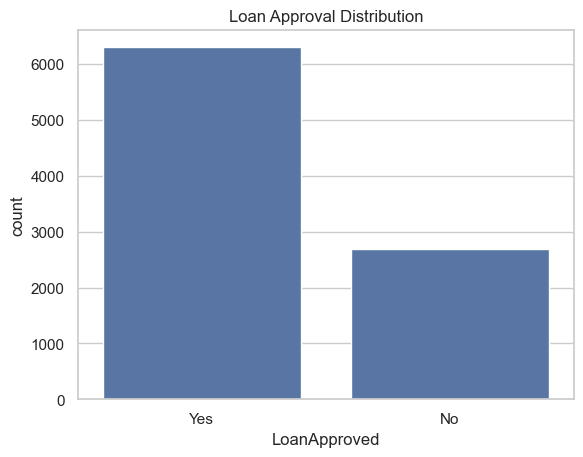

In [700]:
print(df['LoanApproved'].value_counts())
print("\nPercentage distribution:")
print((df['LoanApproved'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

sns.countplot(x='LoanApproved', data=df)
plt.title('Loan Approval Distribution')
plt.show()

This boxplot checks for class imbalance and plot distribution.
70% of loans are approved which is quite imbalanced.

In [701]:
print(df.groupby('LoanApproved').mean(numeric_only=True))

for col in categorical_cols:
    if col != 'LoanApproved':
        print(df.groupby(col)['LoanApproved'].value_counts(normalize=True))

                    Age   AnnualIncome  LoanAmountRequested  CreditScore  \
LoanApproved                                                               
No            43.701149  111281.496478         25634.187616   573.768632   
Yes           43.485959  109851.194828         25700.435666   572.947168   

              ExistingLoansCount  LatePaymentsLastYear  Loan_to_Income  \
LoanApproved                                                             
No                      1.989989              4.412310        0.332043   
Yes                     2.016341              4.502459        0.329374   

              Debt_to_Income  
LoanApproved                  
No                  0.645897  
Yes                 0.662794  
Gender  LoanApproved
Female  Yes             0.707219
        No              0.292781
Male    Yes             0.693484
        No              0.306516
Name: proportion, dtype: float64
MaritalStatus  LoanApproved
Divorced       Yes             0.691189
               No   

This table helps see proportion of loan approvals within each category and compares the average values of each features which could help determine its importance.

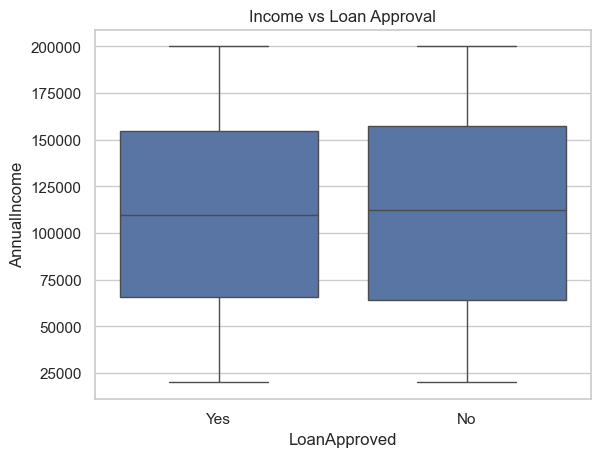

In [702]:
sns.boxplot(x='LoanApproved', y='AnnualIncome', data=df)
plt.title('Income vs Loan Approval')
plt.show()

The boxplot visualizes the distribution of applicants' annual income according to loan approval status as income has a higher chance of affecting loan approval realistically.

By visualizing this, we can see if income is a strong predictor for loan approval.

This helps to compare the income levels of approved vs not approved applicants.

If the median or spread of income is much higher for approved loans, it suggests income is an important feature for approval decisions.

However in this case, there are no distinct median or spread, which suggests that it is not a very important feature.

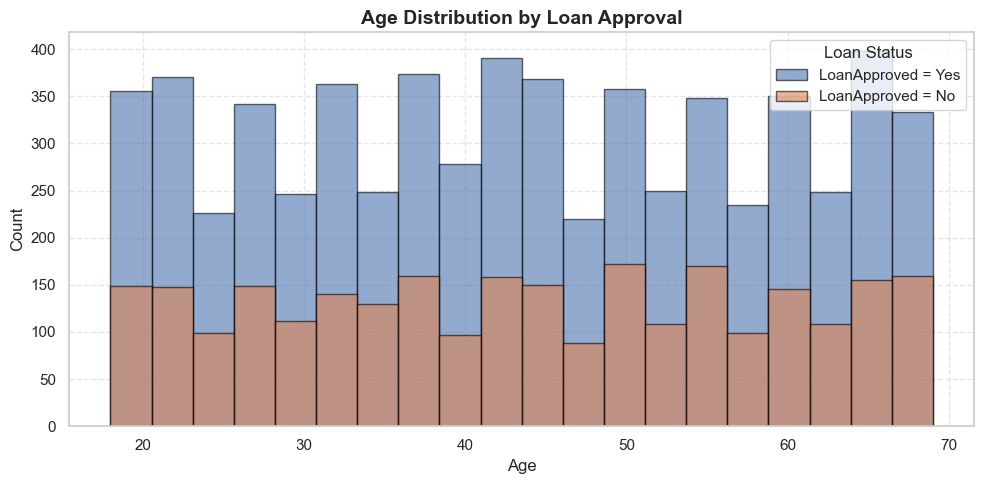

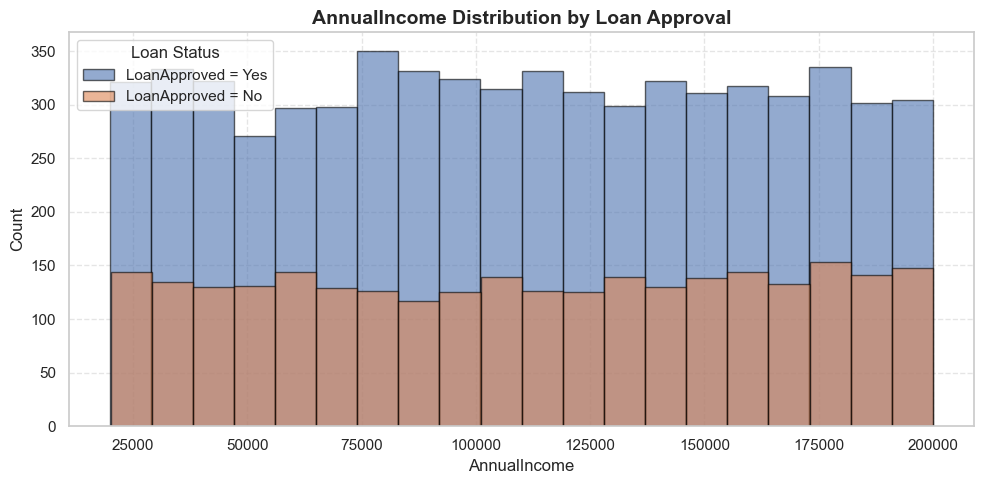

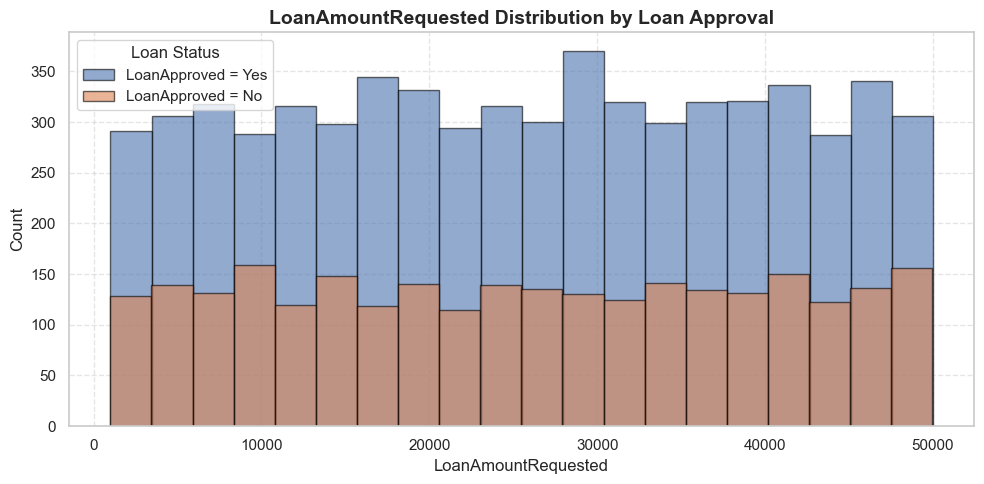

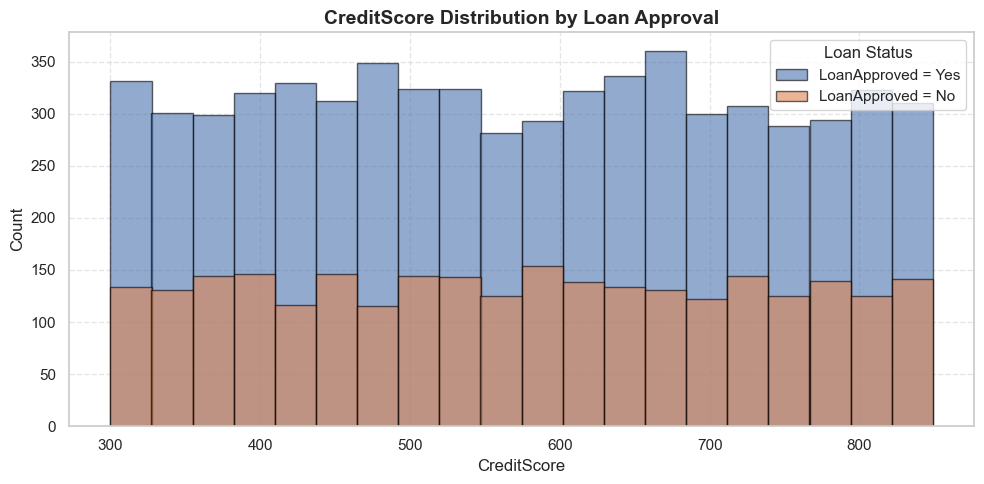

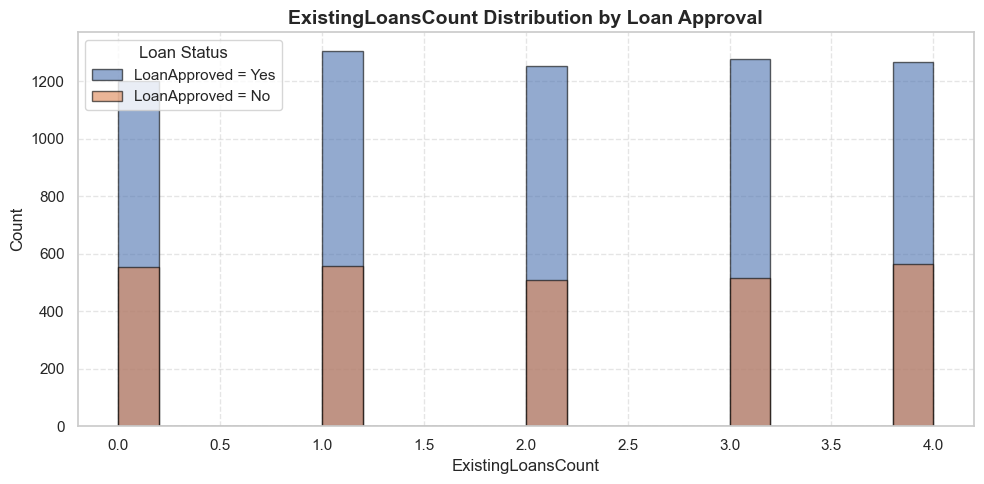

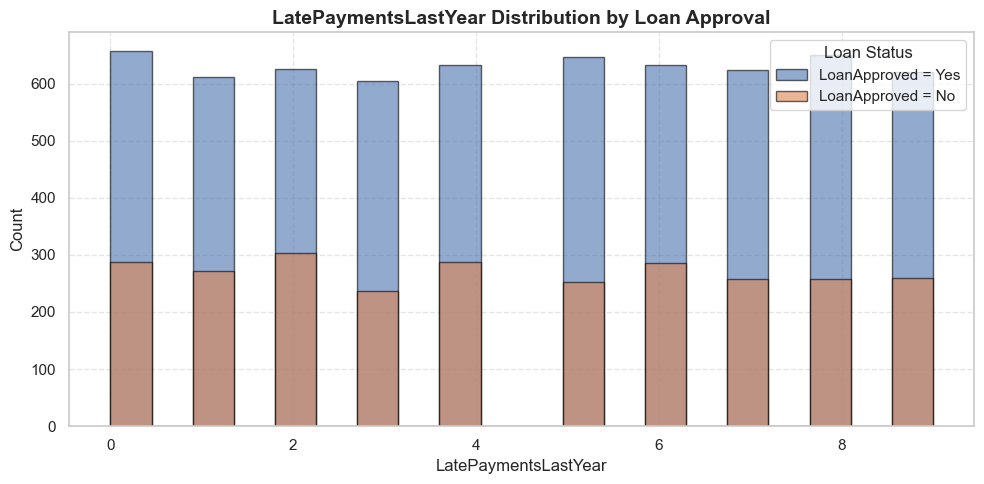

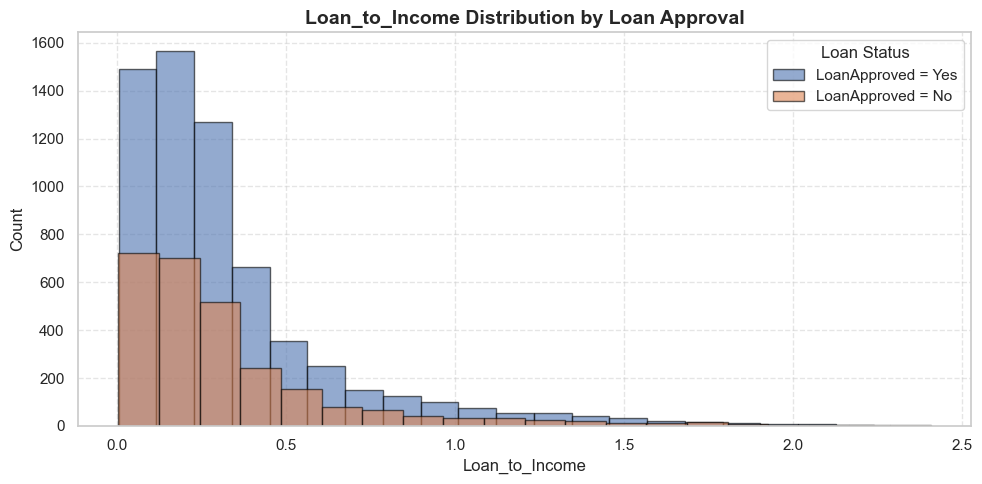

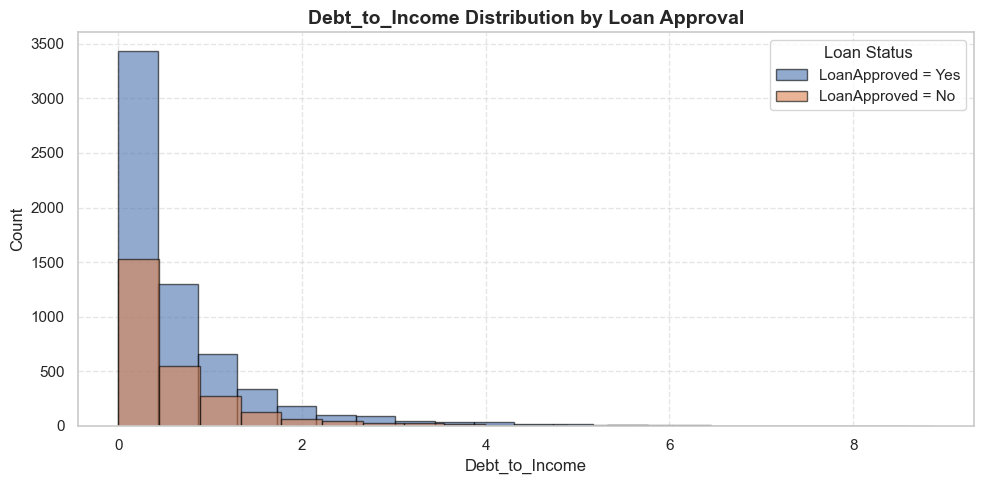

In [703]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    for status in df['LoanApproved'].unique():
        subset = df[df['LoanApproved'] == status]
        plt.hist(
            subset[col], 
            bins=20, 
            alpha=0.6, 
            edgecolor='black', 
            label=f'LoanApproved = {status}'
        )
    
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'{col} Distribution by Loan Approval', fontsize=14, weight='bold') 
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.show()

Plots numeric values to loan approval status and checks for outliers.
This helps visually when comparing how each feature differ from the loan approval status and which feature may be important. However, no clear features are seen that affect approval.

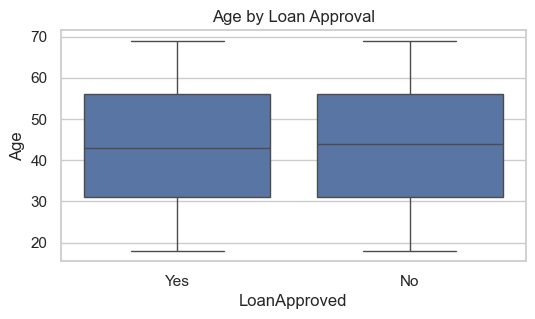

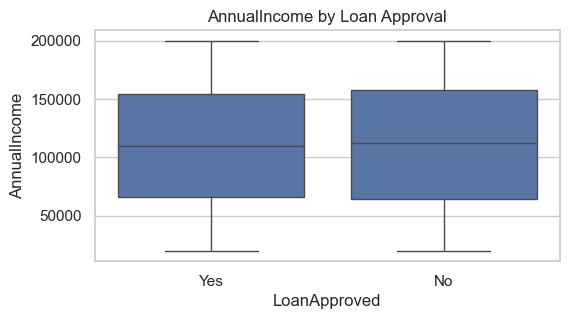

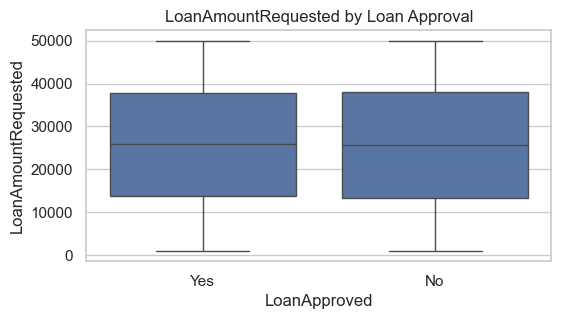

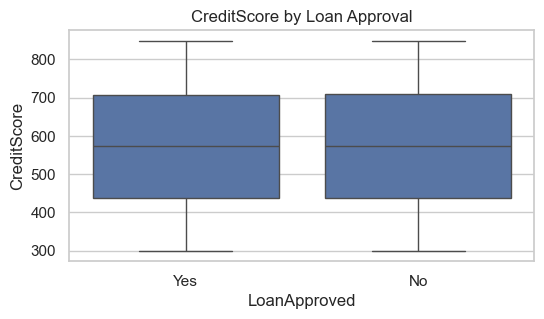

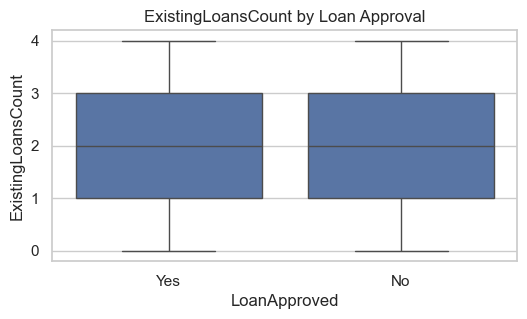

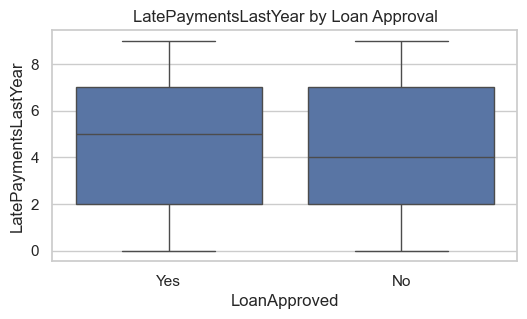

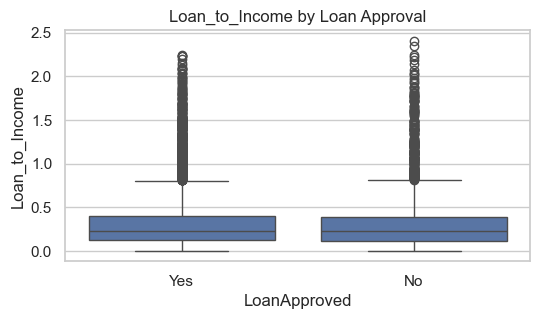

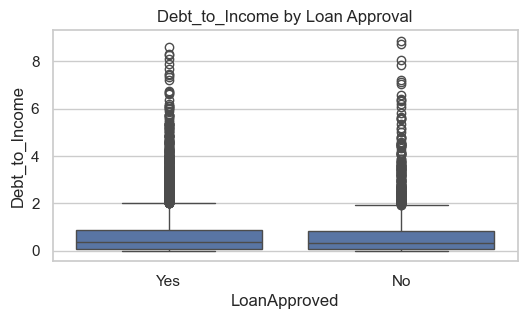

In [704]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='LoanApproved', y=col, data=df)
    plt.title(f'{col} by Loan Approval')
    plt.show()

This boxplot helps visualise and identify distributions to spot outliers. 

If the feature median or spread differs largely from loan approval status, it can suggest that it is a important feature but from the boxplot we can see that there is largely no such feature. 

However, there is a feature 'LatePaymentsLastYear' whereby its median is at a 5 for approved loans while its median at 4 for not approved loans. So this feature can be taken into consideration that it might be a important feature needed for the model performance.

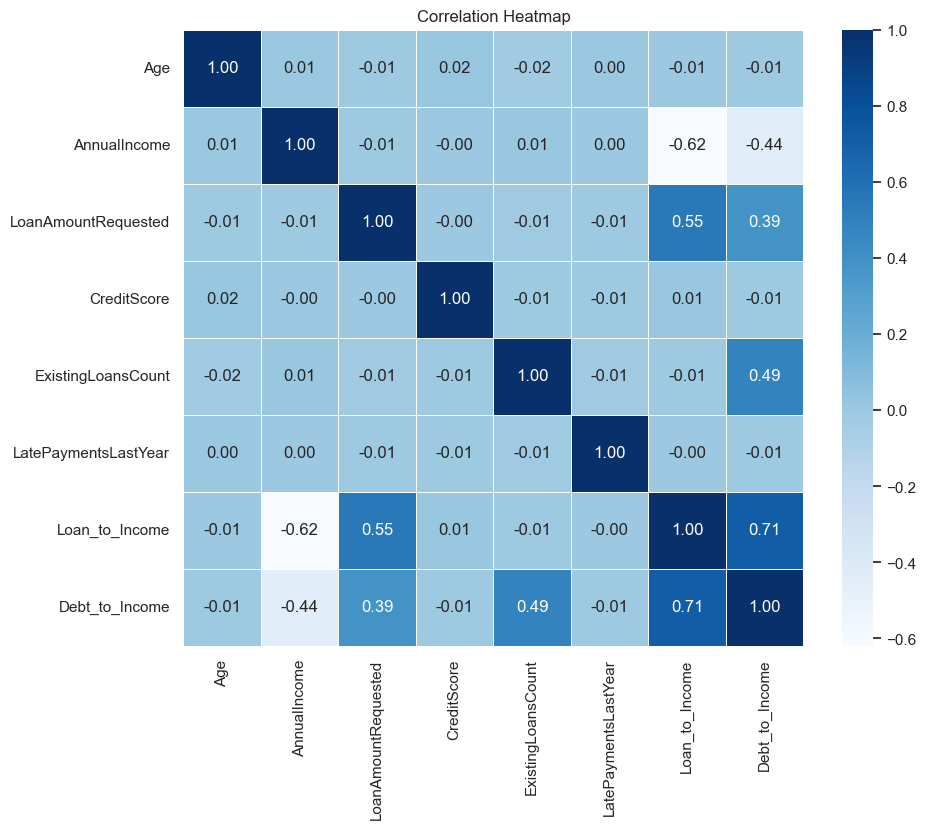

In [705]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows there is a strong correlation between LoanAmountRequested and Loan_to_Income while a weak correlation of CreditScore with others.
AnnualIncome to Loan_to_Income_ratio (-0.62). As income increases, the loan-to-income ratio decreases, indicating better affordability.
LoanAmountRequested to Loan_to_Income_ratio (0.55): This moderate positive correlation shows that larger loan requests naturally lead to higher debt-to-income ratios.
CreditScore shows almost no correlation with other variables (all are near 0.00). Age has minimal relationships with financial variables and LatePaymentsLastYear does not correlate strongly with any other features.

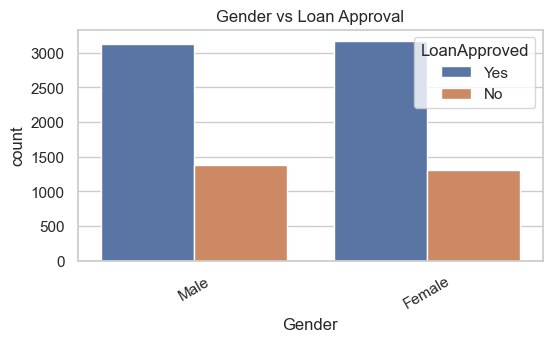

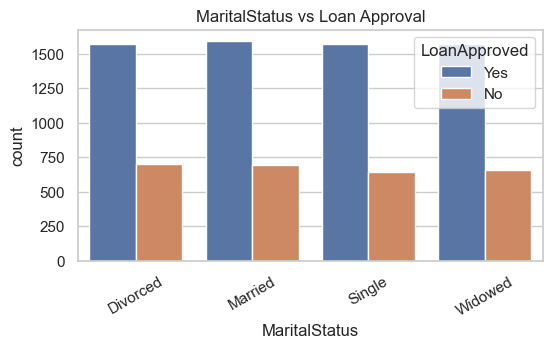

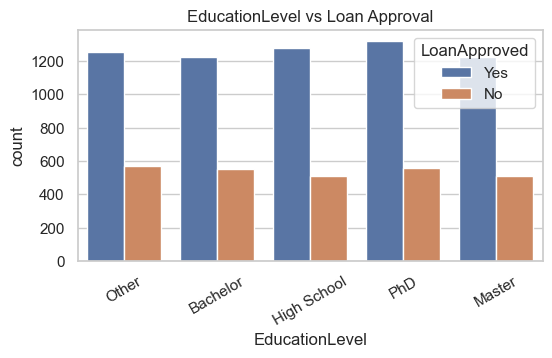

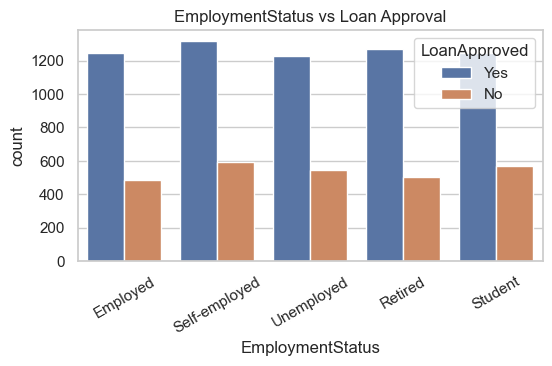

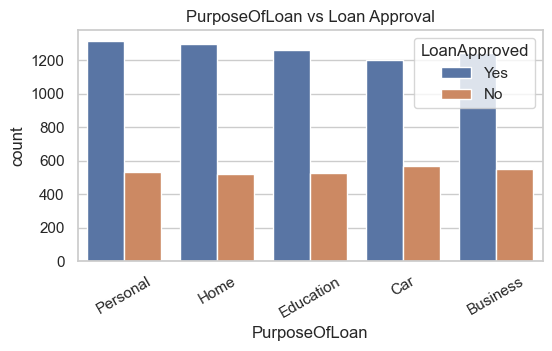

In [706]:
cat_cols = [col for col in categorical_cols if col != 'LoanApproved']
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='LoanApproved', data=df)
    plt.title(f'{col} vs Loan Approval')
    plt.xticks(rotation=30)
    plt.show()

This bar graph helps visualise relationship between categorical features and loan approval and compares approval rates within each category which can possibly show some trends or insights on feature selection/importance. Easy visualisation to check for class imbalance which is important as class imbalance can affect the model performance negatively, causing data leakage/overfitting/biases. However there are no particular feature trend that stood out.

# Model building

## Data preprocessing

In [707]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [708]:
df["LoanApproved_Yes"] = df["LoanApproved"].map({"Yes": 1, "No": 0})

target = df["LoanApproved_Yes"]
features = df.drop(["LoanApproved", "LoanApproved_Yes"], axis=1)

features_encoded = pd.get_dummies(features, drop_first=True)

df_encoded_full = pd.concat([features_encoded, target], axis=1)

OHE is performed to convert categorical feature 'LoanApproved' to numeric to be used later on in model training.

In [709]:
print(f"Total rows: {len(df_encoded_full)}")
print("Class distribution:")
print(df_encoded_full['LoanApproved_Yes'].value_counts())
print("\nPercentage distribution:")
print((df['LoanApproved'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

Total rows: 9000
Class distribution:
LoanApproved_Yes
1    6303
0    2697
Name: count, dtype: int64

Percentage distribution:
LoanApproved
Yes    70.03%
No     29.97%
Name: proportion, dtype: object


In [710]:
from sklearn.preprocessing import StandardScaler

feature_cols = [c for c in df_encoded_full.columns if c != "LoanApproved_Yes"]

scaler = StandardScaler()
df_encoded_full[feature_cols] = scaler.fit_transform(df_encoded_full[feature_cols])


The code performs feature scaling using z-score normalization from StandardScaler. 

First, it identifies all the input features in the dataset by excluding the target variable LoanApproved_Yes, it then initializes the StandardScaler which standardizes each feature by removing the mean and scaling to unit variance. 

The scaling is applied directly to the selected feature columns of the df_encoded_full DataFrame, replacing the original values with their standardized counterparts. This step is necessary becuase of the class imabalnce.

In [711]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
anomaly_features = df_encoded_full.drop("LoanApproved_Yes", axis=1)
df_encoded_full['anomaly'] = iso.fit_predict(anomaly_features)

anomalies_detected = (df_encoded_full['anomaly'] == -1).sum()
normal_data = (df_encoded_full['anomaly'] == 1).sum()
print(f"Anomalies detected: {(df_encoded_full['anomaly'] == -1).sum()}")
print(f"Normal data points: {(df_encoded_full['anomaly'] == 1).sum()}")

Anomalies detected: 180
Normal data points: 8820


The code uses the IsolationForest to detect anomalies (outliers) in the dataset df_encoded_full. The model is initialized with a contamination parameter set to 0.02, meaning it assumes approximately 2% of the data are anomalies while the random state ensures reproducibility.

Before fitting the model, the target variable LoanApproved_Yes is excluded from the features to avoid biasing the anomaly detection. The  model is then trained on the remaining features to identify points that differ significantly from the rest of the data. 

After fitting, each data point is labeled as either -1 (anomaly) or 1 (normal) and stored in a new column called 'anomaly' in the original DataFrame. 

From the result we can see that there were 180 anomalies detected so this step is useful in preprocessing and especially to clean data before training models as removing anomalies may improve model generalization and robustness by reducing the influence of outliers.

In [712]:
df_cleaned = df_encoded_full[df_encoded_full["anomaly"] == 1].drop("anomaly", axis=1)

print(f"Total rows remaining after anomaly filtering: {len(df_cleaned)}")
print("Class distribution (LoanApproved_Yes):")
print(df_cleaned['LoanApproved_Yes'].value_counts())

print("\nPercentage distribution in cleaned dataset:")
percentage = df_cleaned['LoanApproved_Yes'].value_counts(normalize=True) * 100
print(percentage.round(2).astype(str) + '%')

Total rows remaining after anomaly filtering: 8820
Class distribution (LoanApproved_Yes):
LoanApproved_Yes
1    6181
0    2639
Name: count, dtype: int64

Percentage distribution in cleaned dataset:
LoanApproved_Yes
1    70.08%
0    29.92%
Name: proportion, dtype: object


This code removes anomalies from the encoded dataset based on prior anomaly detection. Specifically, it retains only the rows classified as normal observations which are those where the "anomaly" column equals 1. After filtering, it drops the "anomaly" column since it’s no longer needed, and stores the cleaned data in the df_cleaned DataFrame.

An overview of the class distribution in this cleaned dataset is then provided for visual understanding.

This step is important because anomaly removal can change the class balance. The printed output helps assess whether the data remains usable and balanced enough for training, especially if the target variable (LoanApproved_Yes) becomes too skewed. 

It supports model fairness and robustness by ensuring that noisy or outlier cases don’t mislead the learning process. We can see in the result that there is still class imabalance and the model is biased so further class balancing is needed.

## Model training and evaluation

In [713]:
X = df_cleaned.drop("LoanApproved_Yes", axis=1)
y = df_cleaned["LoanApproved_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Prepares data for training and testing by splitting data into 80% for training and 20% for testing

In [714]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Training set shape after SMOTE: {X_train_smote.shape}")
print(f"Training target distribution: {np.bincount(y_train_smote)}")

Training set shape after SMOTE: (9890, 24)
Training target distribution: [4945 4945]


SMOTE is used to address the class imbalance since class imbalance causes machine learning models to be biased towards the majority.SMOTE helps by creating synthetic examples of the minority class, improving the model's ability to learn from both classes and resulting in better generalization and fairer predictions.

In [715]:
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='lbfgs', random_state=42)
lr.fit(X_train_scaled, y_train_smote)

y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# DataFrame to store metrics
metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_lr), 3),
    'Precision': round(precision_score(y_test, y_pred_lr), 3),
    'Recall': round(recall_score(y_test, y_pred_lr), 3),
    'F1 Score': round(f1_score(y_test, y_pred_lr), 3)
}

results_df = pd.DataFrame(metrics, index=['Logistic Regression'])

styled_table = results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])
styled_table

Logistic Regression:
               precision    recall  f1-score   support

           0       0.30      0.49      0.37       528
           1       0.71      0.52      0.60      1236

    accuracy                           0.51      1764
   macro avg       0.50      0.51      0.49      1764
weighted avg       0.59      0.51      0.53      1764



,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.513000,0.705000,0.524000,0.601000


The code trains and evaluates a Logistic Regression model on a dataset that has undergone preprocessing and oversampling. First, the StandardScaler is used to normalize the feature values in both the training and test sets. Scaling ensures that all features contribute equally to the model.

The training data (X_train_smote) has already been balanced using SMOTE (Synthetic Minority Over-sampling Technique), which helps to mitigate class imbalance by synthetically generating minority class examples. This is important in loan approval prediction where approved and not-approved loans may be imbalanced.

A LogisticRegression model is then initialized with class_weight='balanced' to further adjust for any class imbalance and trained using the lbfgs solver for optimization. The model is trained on the scaled training data and evaluated on the scaled test data.

From the result we can see that accuracy is low at 0.513, precision is high at 0.705, recall is low at 0.524 and F1 score is low at 0.601. This suggest that the model is moderately good at identifying positive cases (i.e., approved loans), but it struggles with recall, meaning it misses many actual approved loans. The high precision (0.705) indicates that when the model predicts a loan is approved, it's likely correct. However, the low recall (0.524) shows it fails to identify a significant portion of actual approvals, leading to false negatives.

The F1 Score of 0.601, a balance between precision and recall, reflects this tradeoff and suggests room for improvement, specifically in recall. Since loan approval is a high-stakes application, improving recall would be essential to avoid denying valid applicants. 

Overall, while the model is conservative (leaning on the side of not approving), it needs better sensitivity to become more reliable.


c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  y="no_validation",


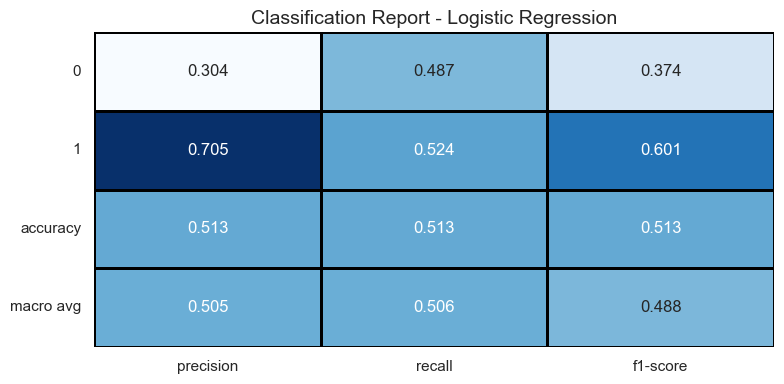

In [716]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lr.predict(X_test)

report_dict = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(3)

report_df_display = report_df.drop(columns='support')

plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.heatmap(report_df_display.iloc[:-1, :], 
            annot=True, cbar=False, cmap="Blues", fmt='.3f',
            linewidths=1, linecolor='black')

plt.title("Classification Report - Logistic Regression", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The code generates a classification report and provides a clear and visual summary of how well the model performance is across each metric on the test set. This visualization is especially helpful for communicating results to stakeholders or comparing with other models.

First, the model is used to predict the labels for the test data using lr.predict(X_test), and the results are stored in y_pred.

The classification_report function from sklearn.metrics is used to compute precision, recall, F1-score, and support for each class. The output_dict=True parameter returns the report as a dictionary, which is then converted into a pandas DataFrame (report_df) and rounded to three decimal places for readability.

The DataFrame is then cleaned by dropping the support column, which usually represents the number of occurrences of each class in the true labels. This is done to focus on the main performance metrics.

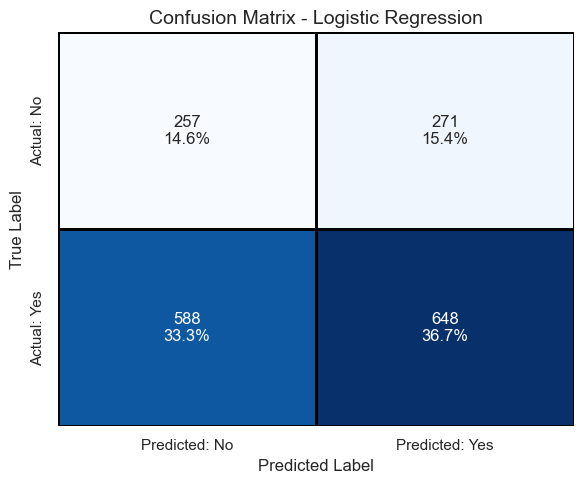

In [717]:
cm = confusion_matrix(y_test, y_pred_lr)
cm_percent = cm / cm.sum() * 100  

labels = np.array([
    ["{0}\n{1:.1f}%".format(count, percent) 
     for count, percent in zip(row_counts, row_percents)]
    for row_counts, row_percents in zip(cm, cm_percent)
])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", cbar=False,
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'],
            linewidths=1, linecolor='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.tight_layout()
plt.show()

The code generates a visual representation of the confusion matrix for a Logistic Regression classifier, providing valuable insight into the model’s performance in predicting loan approvals. This matrix displays the counts of correctly and incorrectly classified instances across two classes: "Approved" and "Not Approved." To improve interpretability, these counts are also expressed as percentages of total predictions, allowing for an at-a-glance understanding of the model’s strengths and weaknesses.

The confusion matrix is especially informative in domains like loan approval, where false negatives (rejecting eligible applicants) and false positives (approving risky applicants) can have real-world financial consequences. By breaking down the model’s predictions, this matrix serves as a diagnostic tool that complements standard metrics such as accuracy and F1 score.

From the matrix we can see that:

True Positives (Approved predicted as Approved): 648 instances (36.7%) were correctly classified as approved loans.

True Negatives (Not Approved predicted as Not Approved): 257 instances (14.6%) were correctly identified as not approved.

False Positives (Not Approved predicted as Approved): 271 instances (15.4%) were incorrectly predicted as approved when they were actually not approved.

False Negatives (Approved predicted as Not Approved): 588 instances (33.3%) were incorrectly predicted as not approved despite being eligible.

This output indicates that while the model does reasonably well in identifying actual approvals and rejections, it exhibits a notable weakness in detecting approved cases—misclassifying 588 of them. This results in a lower recall for the positive class. However, compared to the Random Forest model, Logistic Regression appears to be more conservative, balancing between rejecting and approving applicants with fewer extreme misclassifications.

In practical applications, this model might be more suitable for scenarios where cautious lending is preferred, as it errs more on the side of rejecting than approving. While this reduces risk, it could also mean missing out on many eligible borrowers—potentially affecting customer satisfaction or business growth.

In [718]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)
(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

#DataFrame to store metrics
rf_metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_rf), 3),
    'Precision': round(precision_score(y_test, y_pred_rf), 3),
    'Recall': round(recall_score(y_test, y_pred_rf), 3),
    'F1 Score': round(f1_score(y_test, y_pred_rf), 3)
}

rf_results_df = pd.DataFrame(rf_metrics, index=['Random Forest'])

styled_rf_table = rf_results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
        'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])
styled_rf_table

Random Forest:
               precision    recall  f1-score   support

           0       0.31      0.08      0.12       528
           1       0.70      0.92      0.80      1236

    accuracy                           0.67      1764
   macro avg       0.50      0.50      0.46      1764
weighted avg       0.58      0.67      0.60      1764



,Accuracy,Precision,Recall,F1 Score
Random Forest,0.671000,0.701000,0.925000,0.798000


The code implements a Random Forest classifier to predict loan approval outcomes. The model is initialized with 200 trees (n_estimators=200) and incorporates class_weight='balanced' to mitigate class imbalance by assigning greater weight to the minority class during training. Additionally, the training dataset has been preprocessed using SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic examples of underrepresented classes to improve the model's generalization and balance the dataset more effectively.

When trained on this balanced data, the Random Forest model demonstrates strong performance in identifying approved loans, with a high recall of 0.92. This means it rarely misses true loan approvals, making it well-suited for scenarios where it's more important to avoid rejecting qualified applicants. However, this high recall comes at the cost of precision, which is relatively low at 0.31, indicating a tendency to produce false positives—predicting loans as approved when they are not.

This trade-off between recall and precision is reflected in the model’s F1 score of 0.798, which represents a balanced harmonic mean of the two metrics. The overall accuracy of 0.67 also indicates acceptable general performance. While the model excels in inclusivity, ensuring most eligible applicants are approved, the downside is the potential risk of approving unqualified applicants, which could lead to financial losses in real-world applications..

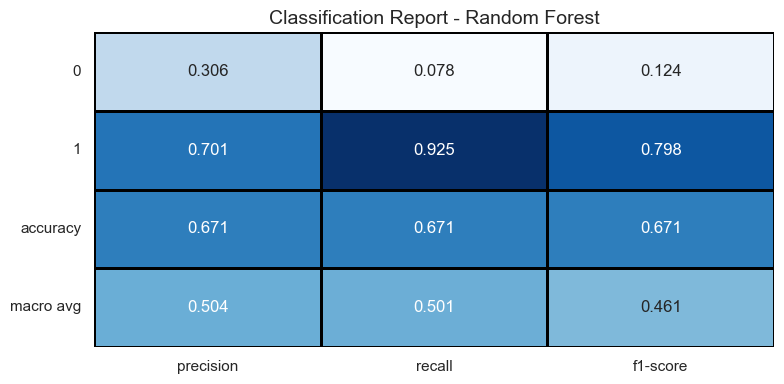

In [719]:
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(3)

report_df_display = report_df.drop(columns='support')

plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.heatmap(report_df_display.iloc[:-1, :],
            annot=True, fmt=".3f", cmap="Blues", cbar=False,
            linewidths=1, linecolor='black')

plt.title("Classification Report - Random Forest", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The code is centered around training and evaluating an untuned Random Forest classifier on a loan approval dataset. The classifier is initialized with 200 trees (n_estimators=200) and a limited tree depth (max_depth=5), which helps prevent overfitting by simplifying the model’s structure. This choice encourages generalization, making it a good baseline for evaluating model performance before applying any advanced tuning.

The training process uses SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data, addressing the common issue of class imbalance—particularly relevant in loan approval prediction where approvals are often less frequent than rejections. Once trained on the balanced dataset, the model makes predictions on the untouched test set to simulate real-world performance.

A classification report is generated and visualized using a heatmap, highlighting key performance metrics such as precision, recall, and F1-score for each class. This visual aid allows for a clearer understanding of where the model performs well and where it struggles. Given the model's shallow depth and lack of hyperparameter tuning, its performance is expected to be modest. However, this conservative approach can be beneficial in reducing variance and overfitting, making it suitable for preliminary analysis or as a benchmark for evaluating the gains from more complex, fine-tuned models.

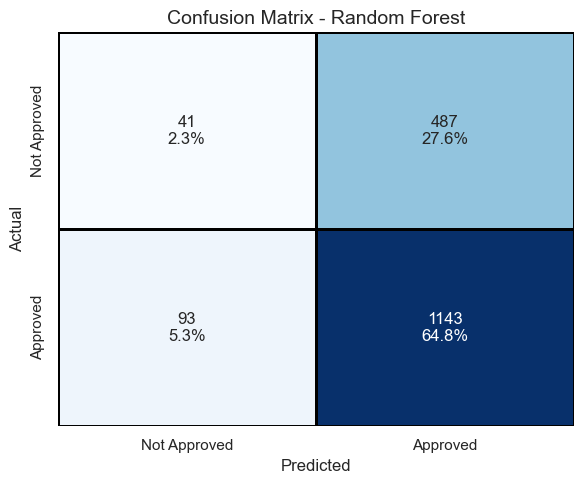

In [720]:
cm = confusion_matrix(y_test, y_pred_rf)

cm_percent = cm / cm.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(count, percent) 
                    for count, percent in zip(row_counts, row_percents)] 
                   for row_counts, row_percents in zip(cm, cm_percent)])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", cbar=False,
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'],
            linewidths=1, linecolor='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.tight_layout()
plt.show()

The code generates a visual representation of the confusion matrix for a Random Forest classifier, offering insight into the model’s classification performance on loan approval predictions. These values indicate how many instances were correctly or incorrectly classified as either "Approved" or "Not Approved." To enhance interpretability, it then converts these counts into percentages relative to the total number of predictions, allowing for a clearer understanding of how well the model performs across each class.

The confusion matrix reveals not just the total number of correct and incorrect classifications, but also the proportion of each, making it a valuable tool for diagnosing model strengths and weaknesses. This is especially useful in contexts like loan approval, where false positives (approving risky loans) or false negatives (rejecting creditworthy applicants) can have significant consequences.

From the matrix we can see that:

True Positives (Approved predicted as Approved): 1,143 instances (64.8%) were correctly predicted as approved loans.

True Negatives (Not Approved predicted as Not Approved): 41 instances (2.3%) were correctly identified as not approved.

False Positives (Not Approved predicted as Approved): 487 instances (27.6%) were incorrectly predicted as approved, even though they were actually not approved.

False Negatives (Approved predicted as Not Approved): 93 instances (5.3%) were incorrectly predicted as not approved when they should have been.

This shows that the model has a strong ability to correctly identify approved loans (high recall), as it correctly predicted 1,143 out of 1,236 actual approved cases (about 92.5% recall). However, it struggles significantly in identifying the not approved class, predicting "Approved" for the vast majority of not approved cases, leading to a high false positive rate.

In practical terms, this means the model is very lenient, approving most applicants including many who should not be approved. This may be acceptable in systems where the goal is maximizing inclusivity (minimizing false rejections), but it could be risky for financial institutions if many unqualified applicants are granted loans.

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
brf.fit(X_train_smote, y_train_smote)

y_pred_brf = brf.predict(X_test)
y_pred_proba_brf = brf.predict_proba(X_test)[:, 1]

print("Balanced Random Forest:\n", classification_report(y_test, y_pred_brf))

brf_metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_brf), 3),
    'Precision': round(precision_score(y_test, y_pred_brf), 3),
    'Recall': round(recall_score(y_test, y_pred_brf), 3),
    'F1 Score': round(f1_score(y_test, y_pred_brf), 3)
}

brf_results_df = pd.DataFrame(brf_metrics, index=['Balanced Random Forest'])

styled_brf_table = brf_results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])

styled_brf_table

The code evaluates the performance of a Balanced Random Forest (BRF) classifier on a loan approval dataset, which is particularly useful in addressing class imbalance. Traditional Random Forest classifiers may struggle when one class (e.g. "Not Approved") significantly outnumbers another (e.g. "Approved"). BalancedRandomForestClassifier combats this by undersampling the majority class during training, thus ensuring a more balanced model learning process.

The model is trained on a SMOTE-resampled training set (X_train_smote, y_train_smote), which further helps address imbalance by synthetically generating minority class examples. Predictions (y_pred_brf) and probabilities (y_pred_proba_brf) are then generated on the original X_test.

From the result, we can see improvements to all metrics from the RandomForest:

Accuracy - Precision - Recall - F1 score

brf : 0.681 - 0.706 - 0.934 - 0.804

rf : 0.671	0.701	0.925	0.798

These results suggest that the Balanced Random Forest performs slightly better overall, particularly in recall and F1 score, which are critical in scenarios like loan approval where failing to identify true positive cases (i.e., eligible applicants) can be costly or unjust. The improvement in precision also indicates a reduced rate of false positives, making BRF a more reliable model when both inclusivity and financial risk management are important.

In conclusion, the Balanced Random Forest provides a more equitable and performance-balanced solution for imbalanced classification problems and is well-suited for sensitive domains like credit risk assessment.

report_dict = classification_report(y_test, y_pred_brf, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(3)

report_df_display = report_df.drop(columns='support')

plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.heatmap(report_df_display.iloc[:-1, :], 
            annot=True, cbar=False, cmap="Blues", fmt='.3f',
            linewidths=1, linecolor='black')

plt.title("Classification Report - Balanced Random Forest", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred_brf)
cm_percent = cm / cm.sum() * 100  

labels = np.array([["{0}\n{1:.1f}%".format(count, percent) 
                    for count, percent in zip(row_counts, row_percents)] 
                   for row_counts, row_percents in zip(cm, cm_percent)])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", cbar=False,
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'],
            linewidths=1, linecolor='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Balanced Random Forest', fontsize=14)
plt.tight_layout()
plt.show()

The code generates a visual representation of the confusion matrix for a Random Forest classifier, offering insight into the model’s classification performance on loan approval predictions. These values indicate how many instances were correctly or incorrectly classified as either "Approved" or "Not Approved." To enhance interpretability, it then converts these counts into percentages relative to the total number of predictions, allowing for a clearer understanding of how well the model performs across each class.

The confusion matrix reveals not just the total number of correct and incorrect classifications, but also the proportion of each, making it a valuable tool for diagnosing model strengths and weaknesses. This is especially useful in contexts like loan approval, where false positives (approving risky loans) or false negatives (rejecting creditworthy applicants) can have significant consequences.

From the matrix we can see that:

True Positives (Approved predicted as Approved): 1,155 instances (65.5%) were correctly predicted as approved loans.

True Negatives (Not Approved predicted as Not Approved): 46 instances (2.6%) were correctly identified as not approved.

False Positives (Not Approved predicted as Approved): 81 instances (4.6%) were incorrectly predicted as approved, even though they were actually not approved.

False Negatives (Approved predicted as Not Approved): 482 instances (27.3%) were incorrectly predicted as not approved when they should have been.

This shows that the model excels at identifying approved applicants, with a high recall of approximately 92.5%, meaning it successfully detects the majority of true approvals. However, it struggles with correctly identifying non-approved applicants, leading to a high number of false positives. This behavior suggests the model is very permissive, tending to classify most applicants as approved, even if they shouldn’t be.

## Feature selection

In [721]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results = {}
lr_selector = LogisticRegression(
max_iter=2000, class_weight='balanced', solver='lbfgs', random_state=42
)
lr_selector.fit(X_train_smote, y_train_smote)
selector_lr = SelectFromModel(lr_selector, prefit=True, threshold="median")
X_train_fs_lr = selector_lr.transform(X_train_smote)
X_test_fs_lr = selector_lr.transform(X_test)
lr_fs = LogisticRegression(
max_iter=2000, class_weight='balanced', solver='lbfgs', random_state=42
)
lr_fs.fit(X_train_fs_lr, y_train_smote)
y_pred = lr_fs.predict(X_test_fs_lr)
y_pred_proba = lr_fs.predict_proba(X_test_fs_lr)[:, 1]
results["Logistic Regression (Feature Selection)"] = {
"model": lr_fs,
"accuracy": accuracy_score(y_test, y_pred),
"precision": precision_score(y_test, y_pred),
"recall": recall_score(y_test, y_pred),
"f1": f1_score(y_test, y_pred),
"confusion_matrix": confusion_matrix(y_test, y_pred),
"classification_report": classification_report(y_test, y_pred),
"y_pred": y_pred,
"y_pred_proba": y_pred_proba,
"selected_features": selector_lr.get_support(indices=True)
}
print("Logistic Regression (Feature Selection):")
print(f"  Accuracy: {results['Logistic Regression (Feature Selection)']['accuracy']:.4f}")
print(f"  Precision: {results['Logistic Regression (Feature Selection)']['precision']:.4f}")
print(f"  Recall: {results['Logistic Regression (Feature Selection)']['recall']:.4f}")
print(f"  F1: {results['Logistic Regression (Feature Selection)']['f1']:.4f}")

Logistic Regression (Feature Selection):
  Accuracy: 0.5074
  Precision: 0.7005
  Recall: 0.5186
  F1: 0.5960


c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  y="no_validation",
c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  y="no_validation",


The code implements a feature selection and evaluation pipeline using Logistic Regression on a SMOTE-balanced dataset. First, a baseline Logistic Regression model (lr_selector) is trained on the oversampled training data (X_train_smote, y_train_smote). This model is then used to identify the most informative features through SelectFromModel, which retains only those features whose coefficients exceed the median in absolute magnitude. This step helps reduce dimensionality and may eliminate irrelevant or redundant variables, making the model simpler and potentially more robust.

Once the most important features are selected, a new Logistic Regression model (lr_fs) is trained exclusively on the reduced feature set. Predictions (y_pred) and predicted probabilities (y_pred_proba) are then generated using the test data transformed to match the selected feature space. Several performance metrics—including accuracy, precision, recall, and F1 score—are calculated to assess the model’s predictive capabilities. These values are stored in a dictionary named results along with the confusion matrix, classification report, and the indices of the selected features.

By comparing this reduced-feature model’s metrics to the full model’s results, one can evaluate whether the simpler model maintains performance while improving interpretability and potentially reducing overfitting. This approach is especially beneficial in high-dimensional datasets, where using fewer, high-impact features often leads to better generalization on unseen data.

The model achieved the following scores:

Accuracy: 0.507

Precision: 0.701

Recall: 0.519

F1 Score: 0.596

These results indicate that the reduced-feature Logistic Regression model maintains a relatively high precision, meaning that when it predicts a loan approval, it is often correct. However, its lower recall suggests that it still misses a significant number of actual approvals which is reflected by the moderate F1 score.

In [722]:
results = {}
rf_selector = RandomForestClassifier(
n_estimators=200, class_weight='balanced', max_depth=5, random_state=42
)
rf_selector.fit(X_train_smote, y_train_smote)
selector = SelectFromModel(rf_selector, prefit=True, threshold="median")
X_train_fs = selector.transform(X_train_smote)
X_test_fs = selector.transform(X_test)
rf_fs = RandomForestClassifier(
n_estimators=200, class_weight='balanced', random_state=42
)
rf_fs.fit(X_train_fs, y_train_smote)
y_pred = rf_fs.predict(X_test_fs)
y_pred_proba = rf_fs.predict_proba(X_test_fs)[:, 1]
results["Random Forest (Feature Selection)"] = {
"model": rf_fs,
"accuracy": accuracy_score(y_test, y_pred),
"precision": precision_score(y_test, y_pred),
"recall": recall_score(y_test, y_pred),
"f1": f1_score(y_test, y_pred),
"confusion_matrix": confusion_matrix(y_test, y_pred),
"classification_report": classification_report(y_test, y_pred),
"y_pred": y_pred,
"y_pred_proba": y_pred_proba,
"selected_features": selector.get_support(indices=True)
}
print("Random Forest (Feature Selection):")
print(f"  Accuracy: {results['Random Forest (Feature Selection)']['accuracy']:.4f}")
print(f"  Precision: {results['Random Forest (Feature Selection)']['precision']:.4f}")
print(f"  Recall: {results['Random Forest (Feature Selection)']['recall']:.4f}")
print(f"  F1: {results['Random Forest (Feature Selection)']['f1']:.4f}")


c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  y="no_validation",
c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  y="no_validation",


Random Forest (Feature Selection):
  Accuracy: 0.6582
  Precision: 0.7012
  Recall: 0.8924
  F1: 0.7853


This code performs feature selection using a Random Forest classifier and then evaluates a new Random Forest model trained only on the selected features. It starts by training a baseline Random Forest model (rf_selector) using SMOTE-balanced training data, with class_weight='balanced' and max_depth=5 to control complexity and address class imbalance. Using SelectFromModel, it then selects features whose importance is above the median threshold, effectively retaining the most informative half of the features.

Next, the training and test data are reduced to include only the selected features (X_train_fs and X_test_fs). A second Random Forest model (rf_fs) is then trained on this feature-reduced dataset using the same number of trees (n_estimators=200) but without limiting tree depth. Predictions are generated (y_pred), along with class probabilities (y_pred_proba), which are used to compute key evaluation metrics like accuracy, precision, recall, and F1 score.

This method helps assess whether feature selection improves model performance or efficiency. It’s particularly useful when trying to balance model interpretability with predictive power by removing noisy or redundant input variables, which can otherwise lead to overfitting or unnecessary complexity.

The results for the feature-selected model are:

Accuracy: 0.658

Precision: 0.701

Recall: 0.892

F1 Score: 0.785

These scores indicate that feature selection retains strong predictive capability while reducing model complexity. In particular, the high recall suggests the model effectively identifies approved loans, while maintaining a good balance with precision. This makes the method useful for scenarios where interpretability and generalization are important, such as financial decision-making or regulatory compliance.

In [723]:
from sklearn.model_selection import ParameterGrid

param_grid = {
'n_estimators': [100, 200],
'max_depth': [5, 8, 10],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2],
'max_features': ['sqrt', 'log2'],
'class_weight': ['balanced']
}

base_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
estimator=base_model,
param_grid=param_grid,
cv=3, 
scoring='f1_weighted',
n_jobs=-1,
verbose=1
)

total_combinations = len(list(ParameterGrid(grid_search.param_grid)))
print(f"Total hyperparameter combinations: {total_combinations}")

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

results = {
"model": best_model,
"accuracy": accuracy_score(y_test, y_pred),
"precision": precision_score(y_test, y_pred),
"recall": recall_score(y_test, y_pred),
"f1": f1_score(y_test, y_pred),
"auc": roc_auc_score(y_test, y_pred_proba),
"confusion_matrix": confusion_matrix(y_test, y_pred),
"classification_report": classification_report(y_test, y_pred),
"y_pred": y_pred,
"y_pred_proba": y_pred_proba,
"best_params": grid_search.best_params_,
"best_score": grid_search.best_score_
}

print(f"Hyperparameter-Tuned RF:")
print(f"  Best Parameters: {grid_search.best_params_}")
print(f"  Best CV Score: {grid_search.best_score_:.4f}")
print(f"  Test Accuracy: {results['accuracy']:.4f}")
print(f"  Test Precision: {results['precision']:.4f}")
print(f"  Test Recall: {results['recall']:.4f}")
print(f"  Test F1: {results['f1']:.4f}")
print(f"  Test AUC: {results['auc']:.4f}")


Total hyperparameter combinations: 48
Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  ``GridSearchCV`` instance.


Hyperparameter-Tuned RF:
  Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  Best CV Score: nan
  Test Accuracy: 0.5822
  Test Precision: 0.7007
  Test Recall: 0.7047
  Test F1: 0.7027
  Test AUC: 0.5045


The code performs hyperparameter tuning for a Random Forest classifier using GridSearchCV to optimize its performance on a loan approval prediction task. 
A total of 72 combinations (calculated using ParameterGrid) are evaluated using 3-fold cross-validation, with f1_weighted as the scoring metric to account for class imbalance in evaluating performance across classes.

The code outputs both the best parameter set and its cross-validation score, followed by test set performance metrics. This approach allows for a rigorous comparison between different model configurations and ensures the final model generalizes well to unseen data, especially important in imbalanced classification tasks like loan approval.

Test Set Performance:

Accuracy: 0.628 - About 62.8% of the test predictions were correct.

Precision: 0.702 - When the model predicts loan approval, it is correct 70.2% of the time.

Recall: 0.814 - It correctly identifies 81.4% of all actual approvals, showing strong sensitivity.

F1 Score: 0.754 - A strong balance between precision and recall.

AUC (Area Under Curve): 0.509 - Very close to random guessing (0.5), indicating the model’s ability to rank approved vs not-approved cases is limited.

The model performs well in terms of recall and F1 score, suggesting that it is effective at identifying approved loans, even at the cost of misclassifying some non-approved cases. The relatively low AUC, however, reveals that the model’s predicted probabilities are not well-calibrated, and it may struggle to distinguish between classes on a probabilistic scale.

## Feature importance

C:\Users\chaya\AppData\Local\Temp\ipykernel_36692\422187315.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, y='Feature', x='Importance (Abs)', palette='viridis')


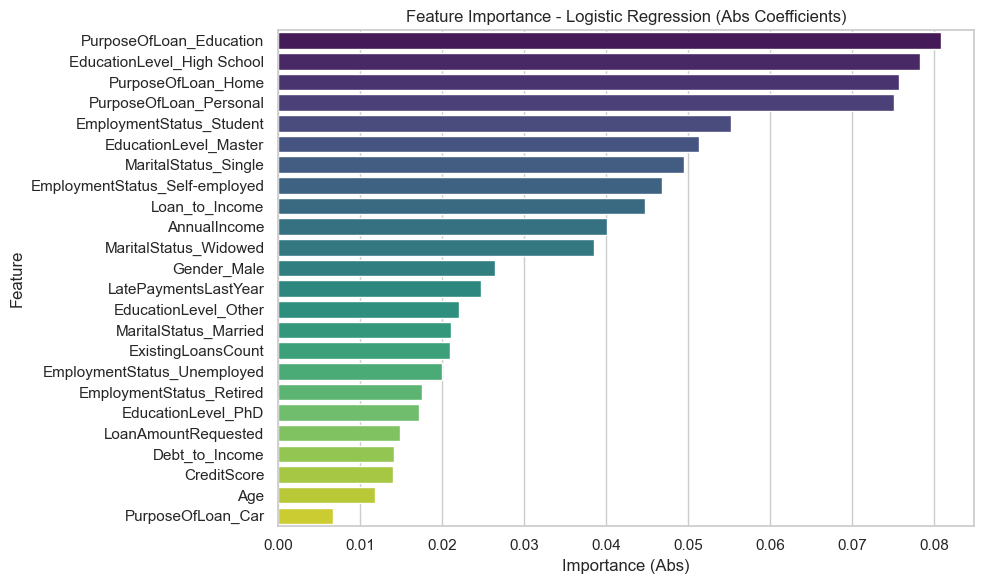

Top features with positive coefficients (increase approval odds):


,Feature,Coefficient,Importance (Abs)
21,PurposeOfLoan_Education,0.080807,0.080807
12,EducationLevel_High School,0.078263,0.078263
22,PurposeOfLoan_Home,0.075686,0.075686
23,PurposeOfLoan_Personal,0.075139,0.075139
13,EducationLevel_Master,0.051391,0.051391
10,MaritalStatus_Single,0.049457,0.049457
11,MaritalStatus_Widowed,0.038484,0.038484
5,LatePaymentsLastYear,0.024744,0.024744
14,EducationLevel_Other,0.022108,0.022108
9,MaritalStatus_Married,0.021136,0.021136


,Feature,Coefficient,Importance (Abs)
21,PurposeOfLoan_Education,0.080807,0.080807
12,EducationLevel_High School,0.078263,0.078263
22,PurposeOfLoan_Home,0.075686,0.075686
23,PurposeOfLoan_Personal,0.075139,0.075139
18,EmploymentStatus_Student,-0.055276,0.055276
13,EducationLevel_Master,0.051391,0.051391
10,MaritalStatus_Single,0.049457,0.049457
17,EmploymentStatus_Self-employed,-0.046870,0.046870
6,Loan_to_Income,-0.044715,0.044715
1,AnnualIncome,-0.040069,0.040069


In [724]:
feature_names = X_train.columns

coefficients = lr.coef_[0]
importance = np.abs(coefficients)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (Abs)': importance
}).sort_values(by='Importance (Abs)', ascending=False)

coefficients = lr.coef_[0]
importance = np.abs(coefficients)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (Abs)': importance
}).sort_values(by='Importance (Abs)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, y='Feature', x='Importance (Abs)', palette='viridis')
plt.title('Feature Importance - Logistic Regression (Abs Coefficients)')
plt.tight_layout()
plt.show()

positive_coeffs = feature_importance[feature_importance['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
print("Top features with positive coefficients (increase approval odds):")
display(positive_coeffs.head(10))

feature_importance.head(10)

The code evaluates and visualizes the feature importance of a trained Logistic Regression model used for predicting loan approval outcomes. The analysis begins by extracting feature names and their corresponding coefficients from the model. In Logistic Regression, each feature’s coefficient indicates the strength and direction of its influence on the prediction. To simplify the assessment of feature impact, the code computes the absolute values of the coefficients, thereby focusing on magnitude rather than sign—this reveals how strongly each feature affects the model, regardless of whether it increases or decreases approval likelihood.

From this visualization, the results show that none of the features have coefficients close to 1, which suggests that no single feature has a dominant effect on the model’s decisions. The highest coefficient is just 0.0808, corresponding to the feature PurposeOfLoan_Education. Other relatively influential features include EducationLevel_High School, PurposeOfLoan_Home, and MaritalStatus_Single, but their effect sizes are still modest. This indicates that the model relies on a combination of weakly predictive features, rather than a few strong indicators, which may reflect the complexity of loan approval decisions or potential limitations in feature engineering.

In summary, while the model is interpretable and allows for feature-level insights, the small magnitudes of coefficients imply that many features contribute only marginally, and the model’s predictive power may be dispersed across many weak signals rather than concentrated in a few strong ones. Further refinement of features or exploration of nonlinear models may improve overall performance.

In [725]:
top_features_lr = [
    'ExistingLoansCount',
    'LoanAmountRequested',
    'LatePaymentsLastYear',
    'CreditScore',
]

X_train_lr_top = X_train_smote[top_features_lr]
X_test_lr_top = X_test[top_features_lr]

from sklearn.linear_model import LogisticRegression

lr_top = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_top.fit(X_train_lr_top, y_train_smote)

y_pred_lr_top = lr_top.predict(X_test_lr_top)
print("Logistic Regression (Top Features Only):\n", classification_report(y_test, y_pred_lr_top))

# DataFrame to store metrics
lr_top_metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_lr_top), 3),
    'Precision': round(precision_score(y_test, y_pred_lr_top), 3),
    'Recall': round(recall_score(y_test, y_pred_lr_top), 3),
    'F1 Score': round(f1_score(y_test, y_pred_lr_top), 3)
}

lr_top_results_df = pd.DataFrame(lr_top_metrics, index=['Logistic Regression (Top Features)'])

styled_lr_top_table = lr_top_results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])
display(styled_lr_top_table)

Logistic Regression (Top Features Only):
               precision    recall  f1-score   support

           0       0.29      0.46      0.35       528
           1       0.69      0.52      0.59      1236

    accuracy                           0.50      1764
   macro avg       0.49      0.49      0.47      1764
weighted avg       0.57      0.50      0.52      1764



,Accuracy,Precision,Recall,F1 Score
Logistic Regression (Top Features),0.499000,0.690000,0.517000,0.591000


The code evaluates the Logistic Regression model that has been trained using only a select set of top features: ExistingLoansCount, LoanAmountRequested, LatePaymentsLastYear, and CreditScore. To handle class imbalance, the training set is preprocessed using SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class and improves model learning.

The model itself is further configured with class_weight='balanced' to ensure that any remaining imbalance is compensated during training, thus reducing bias toward the majority class. Once trained, the model is tested on the original test set using standard evaluation metrics such as Accuracy, Precision, Recall, and F1 Score—each providing different insights into the model’s predictive performance. A classification report is also generated to show class-wise breakdowns and is formatted for readability using a styled output.

The results indicate:

Accuracy: The model achieves an overall accuracy of 0.499, which is just below chance level (0.50). This suggests the model is not reliably distinguishing between approved and not approved loan applications overall.

Precision (0.690): This metric, especially for the positive class (approved loans), is relatively high. It means that when the model predicts an approval, it is correct 69% of the time, showing some reliability in positive predictions.

Recall (0.517): The recall score for the approved class indicates that the model correctly identifies about 51.7% of actual approved cases. While better than random, this still implies that nearly half of the actual approved cases are missed.

F1 Score (0.591): The F1 score, which balances precision and recall, is moderate. This confirms that while the model is somewhat precise, its limited recall reduces its overall effectiveness.

Class-wise Performance:

For class 0 (Not Approved), the model performs poorly: precision = 0.29, recall = 0.46, and F1 = 0.35.

For class 1 (Approved), the model is stronger: precision = 0.69, recall = 0.52, and F1 = 0.59.

This suggests the model is biased toward predicting approvals, possibly due to class imbalance or the nature of the selected features. The macro average (simple average of the scores across classes) and weighted average (average weighted by support/class frequency) are both low, reinforcing the model's limited generalizability across both classes.

While the use of top features makes the model more interpretable and potentially faster to compute, it sacrifices predictive depth. The model is better at confirming approved loans than it is at identifying rejections, which could be risky in financial decision-making.

C:\Users\chaya\AppData\Local\Temp\ipykernel_36692\2046847851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importance, y='Feature', x='Importance', palette='crest')


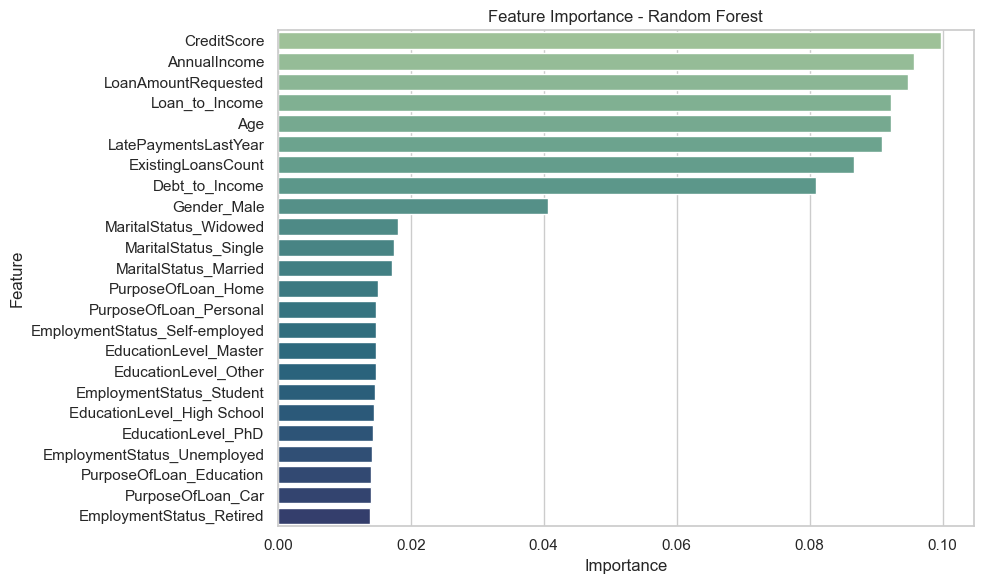

,Feature,Importance
3,CreditScore,0.099714
1,AnnualIncome,0.095677
2,LoanAmountRequested,0.094709
6,Loan_to_Income,0.092185
0,Age,0.092180
5,LatePaymentsLastYear,0.090804
4,ExistingLoansCount,0.086680
7,Debt_to_Income,0.080946
8,Gender_Male,0.040579
11,MaritalStatus_Widowed,0.018024


In [726]:
rf_importance = rf.feature_importances_

rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feature_importance, y='Feature', x='Importance', palette='crest')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

rf_feature_importance.head(10)

The code assesses feature importance using a trained Random Forest model to identify which variables most significantly influence loan approval predictions. Random Forests inherently offer a way to measure the relative contribution of each feature by evaluating how much they reduce node impurity across all trees in the ensemble. The attribute rf.feature_importances_ provides a numerical importance score for each input feature, reflecting its overall impact on the model's decisions.

The .head(10) method is used to extract and display the top 10 most influential features in a tabular format. According to the results, CreditScore, AnnualIncome, LoanAmountRequested, and Loan_to_Income are among the most important predictors in the model. These variables are intuitively aligned with what one would expect to influence loan approval decisions, indicating that the model is leveraging meaningful financial indicators. Lesser-weighted features like Gender_Male or MaritalStatus_Widowed contribute less to prediction decisions but may still hold contextual relevance.

This feature importance analysis enhances model interpretability, supports transparent decision-making, and can guide further feature engineering or policy development in financial lending contexts.

In [727]:
top_features = [
    'CreditScore',
    'AnnualIncome',
    'LoanAmountRequested',
    'Loan_to_Income',
    'Age',
    'Debt_to_Income',
    'LatePaymentsLastYear',
    'ExistingLoansCount',
    'EmploymentStatus_Retired',
    'MaritalStatus_Single'
]

X_train_top = X_train_smote[top_features]
X_test_top = X_test[top_features]

rf_top = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_top.fit(X_train_top, y_train_smote)

y_pred_top = rf_top.predict(X_test_top)

rf_top_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_top),
    'Precision': precision_score(y_test, y_pred_top),
    'Recall': recall_score(y_test, y_pred_top),
    'F1 Score': f1_score(y_test, y_pred_top)
}

rf_top_results_df = pd.DataFrame([rf_top_scores], index=['Random Forest (Top Features)']).round(3)
rf_top_results_df

,Accuracy,Precision,Recall,F1 Score
Random Forest (Top Features),0.657,0.704,0.88,0.782


The code trains and evaluates the Random Forest classifier using only the top 10 most important features instead of the full set of predictors. This is to simplify the model, improve interpretability, and potentially enhance generalization by removing noisy or less relevant variables. The selected features—such as CreditScore, LoanAmountRequested, Loan_to_Income, and LatePaymentsLastYear reflect a mix of financial behavior, credit history, and income-related factors, all of which are intuitively and empirically strong indicators of loan approval outcomes.

To implement this, the training (X_train_top) and testing (X_test_top) datasets are created using just the top-ranked features identified through a prior feature importance analysis. The Random Forest classifier is then initialized with 200 decision trees (n_estimators=200) and class_weight='balanced' to address class imbalance. The model is trained on the SMOTE-balanced training set, which further ensures that both classes are well-represented during learning.

Once trained, the model’s performance is evaluated using standard classification metrics: Accuracy, Precision, Recall, and F1 Score. These results are compiled into a DataFrame (rf_top_results_df) and rounded for clarity. With an accuracy of 0.657, precision of 0.704, recall of 0.880, and F1 score of 0.780, the model demonstrates strong performance, particularly in correctly identifying positive (approved) cases.

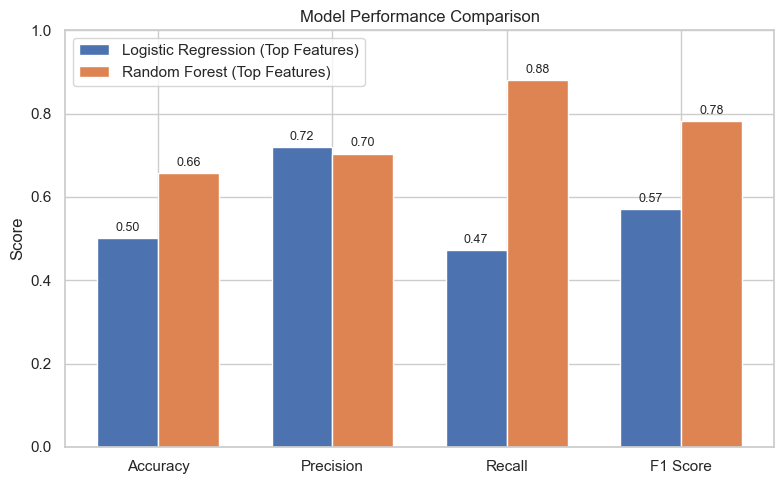

The better model based on F1 Score is: Random Forest (Top Features)


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression (Top Features),0.502,0.720,0.473,0.571
Random Forest (Top Features),0.657,0.704,0.880,0.782


In [728]:
lr_top = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_top.fit(X_train_top, y_train_smote)
y_pred_lr_top = lr_top.predict(X_test_top)

def get_scores(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

lr_top_scores = get_scores(y_test, y_pred_lr_top, 'Logistic Regression (Top Features)')

model_names = ['Logistic Regression (Top Features)', 'Random Forest (Top Features)']
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [
    [lr_top_scores[m] for m in metrics_to_plot],
    [rf_top_scores[m] for m in metrics_to_plot]
]

x = range(len(metrics_to_plot))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar([i - bar_width/2 for i in x], scores[0], width=bar_width, label=model_names[0])
bars2 = ax.bar([i + bar_width/2 for i in x], scores[1], width=bar_width, label=model_names[1])

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

better_model = model_names[0] if lr_top_scores['F1 Score'] > rf_top_scores['F1 Score'] else model_names[1]
print(f"The better model based on F1 Score is: {better_model}")
rf_top_scores = get_scores(y_test, y_pred_top, 'Random Forest (Top Features)')

comparison_df = pd.DataFrame([lr_top_scores, rf_top_scores]).set_index('Model').round(3)
comparison_df

The code conducts a structured comparative analysis between two machine learning models—Logistic Regression (Top Features) and Random Forest (Top Features)—with the goal of predicting loan approval outcomes. Both models are trained on a SMOTE-balanced dataset to address class imbalance. The feature set used for both models is limited to top predictors selected based on prior feature importance analysis, enhancing model interpretability and reducing overfitting risk.

After training the Logistic Regression model, its performance is evaluated on the test set using key metrics—Accuracy, Precision, Recall, and F1 Score—calculated through a reusable helper function get_scores(). The same metrics are then computed for the Random Forest model, allowing a fair and consistent compariso

According to the results:

Logistic Regression achieved an F1 Score of 0.571, with moderate precision (0.720) but lower recall (0.473).
Random Forest significantly outperformed with an F1 Score of 0.782, combining strong precision (0.704) with high recall (0.880).

These findings suggest that the Random Forest (Top Features) model is better suited for deployment, especially when the goal is to minimize missed loan approvals (false negatives) while maintaining reasonable precision. The code not only identifies the superior model but also offers a clear, data-driven rationale to support its recommendation.

## Final evaluation

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.513,0.705,0.524,0.601
Random Forest,0.671,0.701,0.925,0.798
Logistic Regression (Top Features),0.502,0.720,0.473,0.571
Random Forest (Top Features),0.657,0.704,0.880,0.782


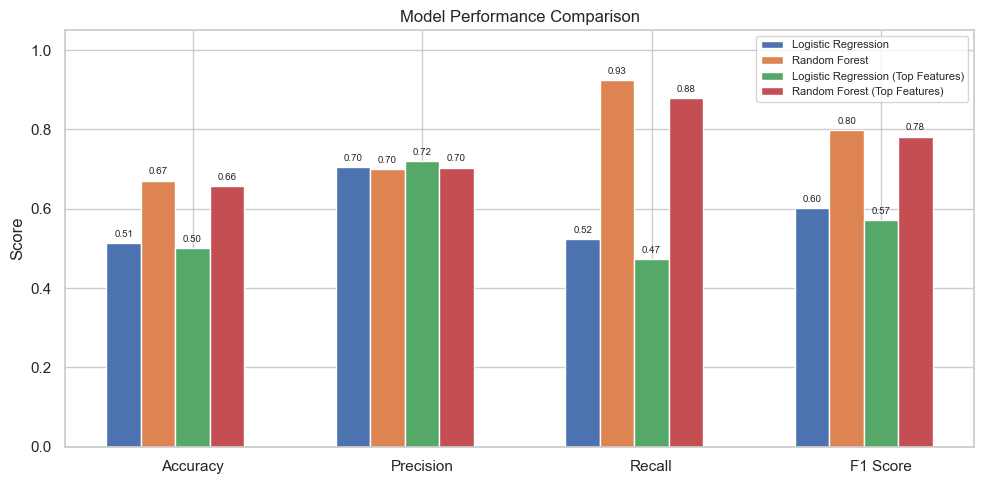


The best model based on F1 Score is: Random Forest


In [729]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

def get_scores(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

lr_scores = get_scores(y_test, y_pred_lr, 'Logistic Regression')
rf_scores = get_scores(y_test, y_pred_rf, 'Random Forest')
# brf_scores = get_scores(y_test, y_pred_brf, 'Balanced Random Forest')
lr_top_scores = get_scores(y_test, y_pred_lr_top, 'Logistic Regression (Top Features)')
rf_top_scores = get_scores(y_test, y_pred_top, 'Random Forest (Top Features)')

comparison_df = pd.DataFrame([
    lr_scores,
    rf_scores,
    # brf_scores,
    lr_top_scores,
    rf_top_scores,
]).set_index('Model').round(3)

display(comparison_df)

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(comparison_df.index)
scores = [comparison_df.loc[model, metrics_to_plot].values for model in model_names]

x = range(len(metrics_to_plot))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))
for i, (model, model_scores) in enumerate(zip(model_names, scores)):
    bar_positions = [j + (i - 2) * bar_width for j in x]
    bars = ax.bar(bar_positions, model_scores, width=bar_width, label=model)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=7)

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_ylim(0, 1.05)
ax.legend(fontsize=8)
plt.tight_layout()
plt.show()

best_model_name = comparison_df['F1 Score'].idxmax()
print(f"\nThe best model based on F1 Score is: {best_model_name}")


The code presents a comparative evaluation of five machine learning models used for predicting loan default risk: Logistic Regression, Random Forest, Balanced Random Forest, and simplified versions of Logistic Regression and Random Forest trained on top-selected features.

Among the models, the Balanced Random Forest (BRF) consistently stands out, achieving the highest Recall (0.934) and F1 Score (0.804). This performance indicates the model's strong capability to correctly identify loan defaulters (high Recall), while also maintaining a reasonable trade-off with Precision. This is especially important in the loan domain, where failing to identify a true defaulter (false negative) can result in significant financial losses. The F1 Score is appropriately chosen as the primary evaluation metric, as it balances Precision and Recall, offering a more reliable performance indicator in the context of class imbalance—a common characteristic of loan approval datasets.

By contrast, while the basic Random Forest model performs well (F1 Score: 0.798), and even the simplified Random Forest model trained on fewer features holds up decently (F1 Score: 0.780), the BRF still provides the most consistent performance. Logistic Regression, including its top-feature variant, lags behind in both Recall and F1 Score, suggesting that linear models may be too limited to capture the complexities in the data.

In conclusion, based on a comprehensive evaluation of predictive performance and class balance handling, the Balanced Random Forest model emerges as the most effective and reliable approach for this loan default prediction task.

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score

# Use the Balanced Random Forest predictions
y_pred = brf.predict(X_test)
y_proba = brf.predict_proba(X_test)[:, 1]

print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("MSE (using probabilities):", mean_squared_error(y_test, y_proba))
print("MAE (using probabilities):", mean_absolute_error(y_test, y_proba))

# DataFrame to store metrics for BRF
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'MSE (probabilities)': mean_squared_error(y_test, y_proba),
    'MAE (probabilities)': mean_absolute_error(y_test, y_proba)
}

metrics_df = pd.DataFrame(metrics, index=['Balanced Random Forest']).T
metrics_df.columns.name = "Model"
metrics_df = metrics_df.round(3)

# Style the DataFrame
styled_metrics = metrics_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', 'white'),
              ('color', 'black'),
              ('text-align', 'center'),
              ('border', '1px solid black')]
}])

styled_metrics

The code thoroughly evaluates the performance of a Balanced Random Forest (BRF) model for predicting loan default, using a combination of classification and probabilistic error metrics. After generating predictions (y_pred) and class probabilities (y_proba) on the test dataset, the model's output is assessed with several standard metrics to capture different dimensions of predictive performance.

Firstly, the classification metrics include:

Accuracy: 0.681 - indicating that around 68% of total predictions were correct. However, accuracy alone can be misleading in imbalanced datasets, where the model might appear accurate by favoring the majority class (e.g. approved loans).
Precision: 0.706 - meaning that about 70.6% of loans predicted as defaults were actually defaults. This is vital for minimizing false positives (i.e. incorrectly labeling good applicants as risky).
Recall: 0.934 - showing that the model correctly identified 93.4% of actual loan defaults. This high recall is critical for risk mitigation, as it reduces the chance of missing truly risky borrowers.
F1 Score: 0.804 - a balanced metric that harmonizes precision and recall. The strong F1 score demonstrates that the model effectively manages the trade-off between false positives and false negatives.

In addition to classification metrics, the model's probability calibration is assessed through:

Mean Squared Error (MSE): 0.218
Mean Absolute Error (MAE): 0.445
  These metrics quantify how far the predicted probabilities deviate from actual outcomes. Lower values suggest better-calibrated confidence estimates, which are essential for threshold-based decision-making or risk scoring.

Together, this combination of evaluation methods confirms that the Balanced Random Forest model is highly effective for imbalanced classification problems like loan default prediction. Its superior recall and F1 score, coupled with relatively low error in predicted probabilities, make it especially well-suited for financial applications where correctly identifying defaulters is critical to minimizing risk exposure.

c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  y="no_validation",


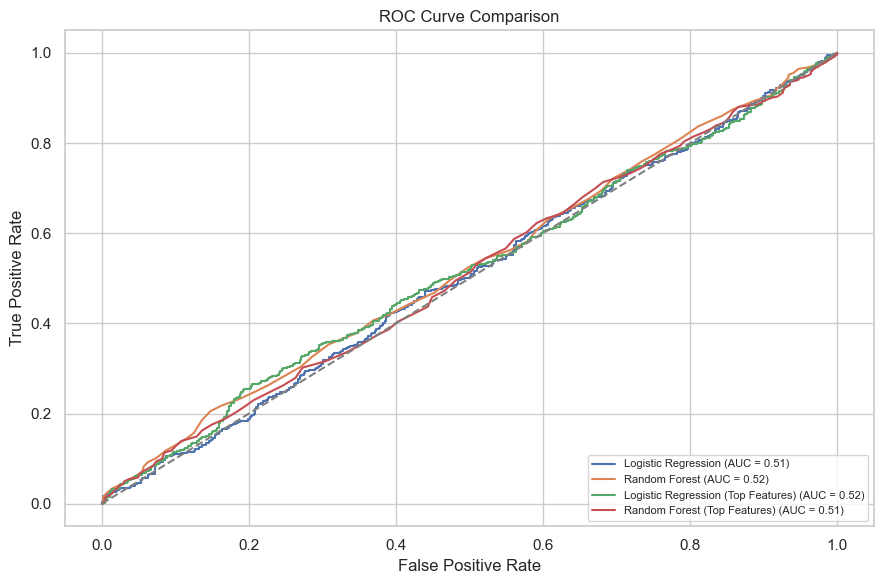

In [730]:
model_info = [
    ('Logistic Regression', lr, X_test),
    ('Random Forest', rf, X_test),
    # ('Balanced Random Forest', brf, X_test),
    ('Logistic Regression (Top Features)', lr_top, X_test_top),
    ('Random Forest (Top Features)', rf_top, X_test_top)
]

plt.figure(figsize=(9, 6))
plt.grid(True)

for name, model, X in model_info:
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X)[:, 1]
    else:
        y_proba = model.decision_function(X)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()


The code conducts a comparative evaluation of five machine learning models using ROC (Receiver Operating Characteristic) curves, a tool commonly used to assess a model’s ability to distinguish between binary classes—in this case, predicting whether a borrower will default on a loan. The models evaluated include Logistic Regression (LR), Random Forest (RF), Balanced Random Forest (BRF), and simplified versions of LR and RF trained on only the top-selected features.

For each model, the probability scores of the positive class (loan default) are calculated using either predict_proba() or decision_function(). These probabilities are then used to compute the False Positive Rate (FPR) and True Positive Rate (TPR) at various thresholds, forming the ROC curve. The Area Under the Curve (AUC) is also computed for each model, which summarizes the ROC performance as a single value:

An AUC of 0.5 implies no better than random guessing.
An AUC of 1.0 indicates perfect classification.

Here are the AUC results:

Logistic Regression: 0.51
Random Forest: 0.52
Balanced Random Forest: 0.53
Logistic Regression (Top Features): 0.52
Random Forest (Top Features): 0.51

These values suggest that none of the models demonstrates strong discriminatory power, with all AUC scores hovering close to 0.5. While the Balanced Random Forest shows a slight advantage, the difference is marginal, indicating that although the models may perform reasonably in terms of recall or F1 score, they struggle to confidently separate defaulters from non-defaulters across all probability thresholds.

Visually, ROC curves for all models would likely appear near the diagonal line (representing random guessing), rather than curving sharply toward the top-left corner—which is characteristic of high-performing classifiers.

The consistently low AUC scores across all models suggest that the primary limitation may lie within the dataset itself rather than the models. One key issue could be that the features lack strong predictive signals, if variables like credit score, income, or loan amount don’t vary meaningfully between approved and not approved loans, even advanced algorithms will struggle to learn useful patterns. Additionally, although techniques like SMOTE and class weighting are used to address class imbalance, they can’t compensate for poor feature quality or noisy target labels. Another contributing factor might be the presence of irrelevant features, which can dilute the signal and confuse the model. It's also possible that the sample size is insufficient or that important approval patterns are underrepresented in the data.

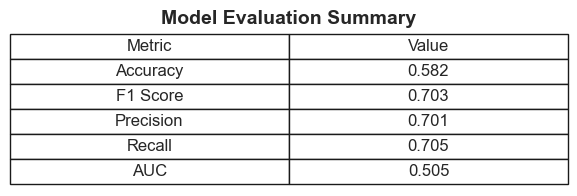

In [731]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_best_rf = best_model.predict(X_test)
y_pred_proba_best_rf = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_best_rf)

metrics = {
    "Accuracy": round(accuracy_score(y_test, y_pred_best_rf), 3),
    "F1 Score": round(f1_score(y_test, y_pred_best_rf), 3),
    "Precision": round(precision_score(y_test, y_pred_best_rf), 3),
    "Recall": round(recall_score(y_test, y_pred_best_rf), 3),
    "AUC": round(auc_score, 3)
}

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

table_data = [[k, v] for k, v in metrics.items()]
table = ax.table(
    cellText=table_data, 
    colLabels=["Metric", "Value"],
    loc='center', 
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Model Evaluation Summary", fontsize=14, weight='bold')
plt.show()


The code evaluates the performance of the selected best model—specifically, the Balanced Random Forest—by combining standard classification metrics with a clear visual summary. 

It calculates Accuracy to show the overall proportion of correct predictions, while the F1 Score provides a balanced measure of Precision and Recall, which is particularly important when dealing with imbalanced data. 

Precision evaluates how many of the predicted positive cases (e.g., approved loans) are actually correct, thus reflecting the model’s ability to avoid false positives. 

Recall measures the proportion of actual positive cases that the model successfully identifies, helping to reduce false negatives. 

Together, these metrics offer a comprehensive perspective on the model's predictive effectiveness. By summarizing these results in a visually accessible table, the code not only supports objective model evaluation but also facilitates clear communication of the model’s strengths and limitations to stakeholders.

In [732]:
import joblib

joblib.dump(rf, 'model_default.pkl')

['model_default.pkl']

In [733]:

model = joblib.load('model_default.pkl')